# 📝 Exercise M7.01

In this exercise we will define dummy classification baselines and use them
as reference to assess the relative predictive performance of a given model
of interest.

We illustrate those baselines with the help of the Adult Census dataset,
using only the numerical features for the sake of simplicity.

In [1]:
import pandas as pd

adult_census = pd.read_csv("../datasets/adult-census-numeric-all.csv")
data, target = adult_census.drop(columns="class"), adult_census["class"]

First, define a `ShuffleSplit` cross-validation strategy taking half of the
samples as a testing at each round. Let us use 10 cross-validation rounds.

In [9]:
from sklearn.model_selection import ShuffleSplit

cv= ShuffleSplit(n_splits=10, test_size=0.5)

Next, create a machine learning pipeline composed of a transformer to
standardize the data followed by a logistic regression classifier.

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

model = make_pipeline(StandardScaler(), LogisticRegression())

Compute the cross-validation (test) scores for the classifier on this
dataset. Store the results pandas Series as we did in the previous notebook.

In [13]:
from sklearn.model_selection import cross_validate

cv_results_log_reg = cross_validate(model, data, target)

In [17]:
lin_model_scores = pd.Series(cv_results_log_reg['test_score'], name='logistic_regression')

Now, compute the cross-validation scores of a dummy classifier that
constantly predicts the most frequent class observed the training set. Please
refer to the online documentation for the [sklearn.dummy.DummyClassifier
](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
class.

Store the results in a second pandas Series.

In [18]:
from sklearn.dummy import DummyClassifier

dummy_model = DummyClassifier(strategy='most_frequent')
cv_results_dummy = cross_validate(dummy_model, data,target)
dummy_scores = pd.Series(cv_results_dummy['test_score'], name='dummy_model')



Now that we collected the results from the baseline and the model,
concatenate the test scores as columns a single pandas dataframe.

In [23]:
model_df = pd.concat([dummy_scores, lin_model_scores],axis=1)
model_df

,dummy_model,logistic_regression
0,0.760672,0.812161
1,0.760672,0.809602
2,0.760749,0.813370
3,0.760749,0.813268
4,0.760749,0.822072



Next, plot the histogram of the cross-validation test scores for both
models with the help of [pandas built-in plotting
function](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#histograms).

What conclusions do you draw from the results?

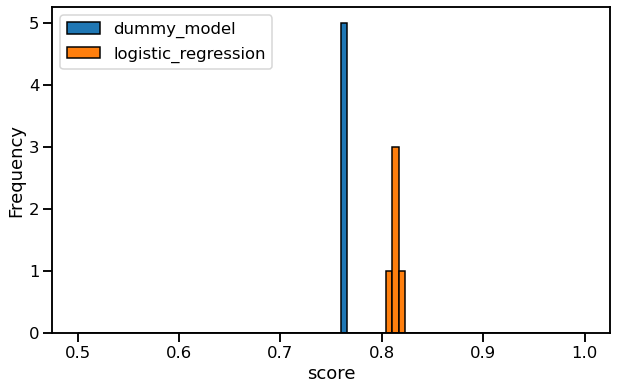

In [37]:
import numpy as np 
import matplotlib.pyplot as plt

bins = np.linspace(start=0.5, stop=1, num=80)
model_df.plot.hist(bins=bins, edgecolor="black", figsize=(10,6))
plt.xlabel('score')
plt.legend(loc='upper left')

Change the `strategy` of the dummy classifier to `"stratified"`, compute the
results. Similarly compute scores for `strategy="uniform"` and then the  plot
the distribution together with the other results.

Are those new baselines better than the previous one? Why is this the case?

Please refer to the scikit-learn documentation on
[sklearn.dummy.DummyClassifier](
https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
to find out about the meaning of the `"stratified"` and `"uniform"`
strategies.

In [38]:
dummy_strat_model = DummyClassifier(strategy='stratified')
cv_results_dummy = cross_validate(dummy_strat_model, data,target)
dummy_strat_scores = pd.Series(cv_results_dummy['test_score'], name='dummy_strat_model')

dummy_uniform_model = DummyClassifier(strategy='uniform')
cv_results_dummy = cross_validate(dummy_uniform_model, data,target)
dummy_uniform_scores = pd.Series(cv_results_dummy['test_score'], name='dummy_uniform_model')

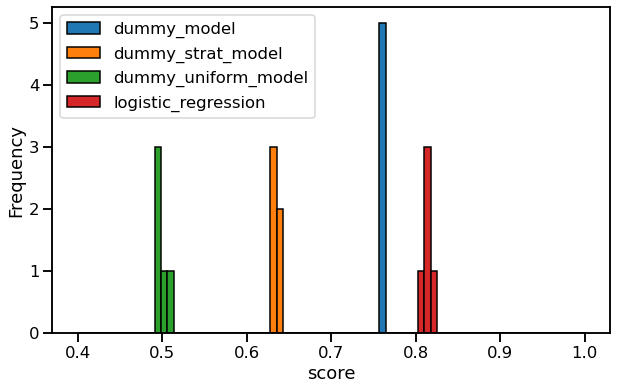

In [44]:
bins = np.linspace(start=0.4, stop=1, num=80)
pd.concat([dummy_scores, dummy_strat_scores, dummy_uniform_scores,lin_model_scores], axis=1).plot.hist(bins=bins, edgecolor="black", figsize=(10,6))
plt.xlabel('score')
plt.legend(loc='upper left')